## K-nearest neighbors

In [33]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#cross validation 
from sklearn.model_selection import cross_val_score, GridSearchCV
# import custom functions
from custom_functions import our_metrics
%config Completer.use_jedi = False
pd.set_option('display.max_rows', None)
from sklearn import metrics

In [2]:
# reading all the csv files 
y_train = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv')
y_test = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv')
X_test = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_dropped_first.csv')
X_train = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_dropped_first.csv')

In [3]:
# Train model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean')

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3344
_____________________
Weighted Quadratic Kappa: 0.2114


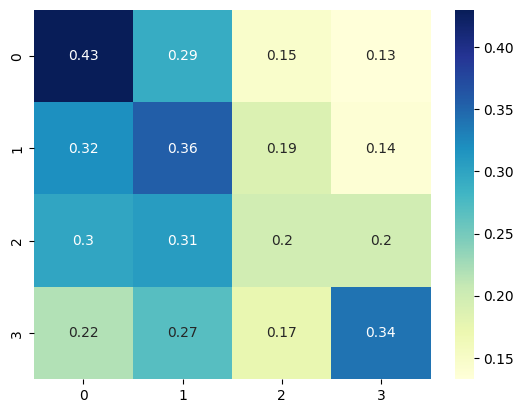

In [4]:
# Predict on test set
y_pred = knn.predict(X_test)

# Print accuracy score  and weighted Kappa
our_metrics(y_test, y_pred, normalize=True)

# Print confusion matrix
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn', fmt='g');

### Evaluate the KNN 

In [5]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, np.ravel(y_train))
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(2892, 1)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

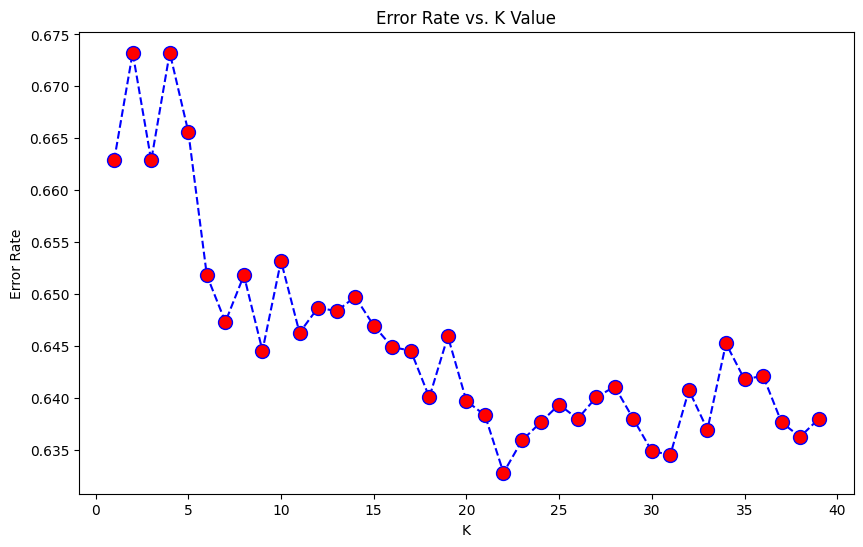

In [6]:
# elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [7]:
#retrain the KNN model with the new K value

# NOW WITH K=22
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)


/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=22)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3672
_____________________
Weighted Quadratic Kappa: 0.2522


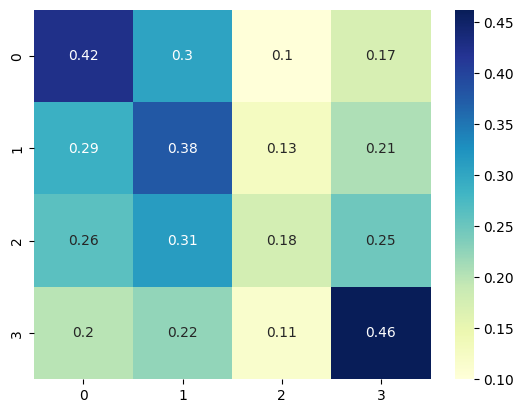

In [8]:
pred = knn.predict(X_test)

# Print accuracy score  and weighted Kappa
our_metrics(y_test, pred, normalize=True)

### Cross validation to find the best value of K

In [9]:
#checking accuracy on train data
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConv

In [10]:
# best parameter from grid search
print(grid_search.best_params_)

{'n_neighbors': 28}


In [11]:
# accuracy
accuracy = grid_search.best_score_ 
print("Accuracy for our training dataset with tuning is : {:f}" .format(accuracy) )

Accuracy for our training dataset with tuning is : 0.353170


In [12]:
#checking accuracy on test data
knn = KNeighborsClassifier(n_neighbors=39)

knn.fit(X_train, np.ravel(y_train))

y_pred_hat=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred_hat)

print("Accuracy for our testing dataset with tuning is : {:2f}".format(test_accuracy) )


Accuracy for our testing dataset with tuning is : 0.362033


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.362
_____________________
Weighted Quadratic Kappa: 0.2707


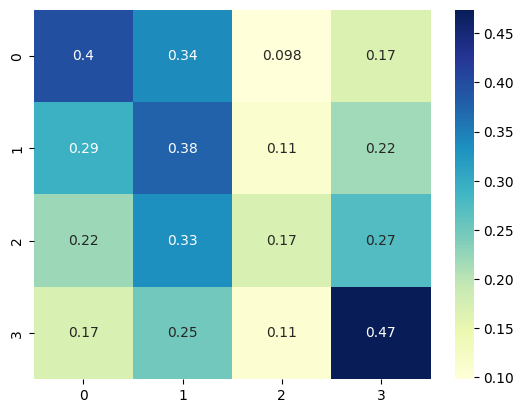

In [13]:
# Print accuracy score  and weighted Kappa
our_metrics(y_test, y_pred_hat, normalize=True)

### For dogs dataset

In [14]:
# import the csv files

y_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_dogs.csv')
y_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_dogs.csv')

X_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_dogs_dropped.csv')
X_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_dogs_dropped.csv')

In [15]:
# Train model
knn_dogs = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_dogs.fit(X_train_dogs, np.ravel(y_train_dogs))

KNeighborsClassifier(metric='euclidean')

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3521
_____________________
Weighted Quadratic Kappa: 0.2875


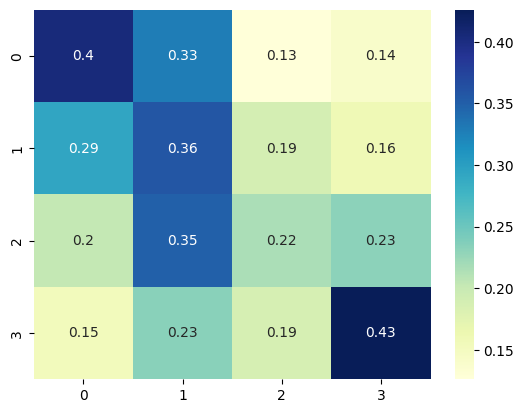

In [16]:
# Predict on dog test set
y_pred_dogs = knn_dogs.predict(X_test_dogs)

# Print accuracy score  and weighted Kappa
our_metrics(y_test_dogs, y_pred_dogs, normalize=True)

/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConv

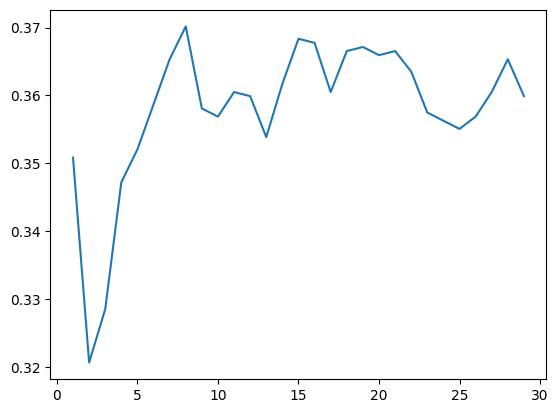

In [17]:
#check accuracy for different values for k for dogs dataset
k_range = list(range(1, 30))
scores_d = []
for i in k_range:
    knn_d = KNeighborsClassifier(n_neighbors=i)
    knn_d.fit(X_train_dogs, y_train_dogs)
    y_pred_d = knn_d.predict(X_test_dogs)
    scores_d.append(metrics.accuracy_score(y_test_dogs, y_pred_d))
plt.plot(k_range, scores_d)
plt.show()

In [46]:
#checking accuracy on train data
k_range = list(range(1, 30))
#param_grid = dict(n_neighbors=k_range)
grid_params = { 'n_neighbors' : [range(1,30)],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_dogs, y_train_dogs)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConv

In [47]:
# best parameter from grid search
print(grid_search.best_params_)

{'n_neighbors': 11}


In [48]:
# accuracy
accuracy = grid_search.best_score_ 
print("Accuracy for our training dataset with tuning is : {:f}" .format(accuracy) )

Accuracy for our training dataset with tuning is : 0.364877


In [40]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_dogs, np.ravel(y_train_dogs))

y_test_dogs2=knn.predict(X_test_dogs) 

test_accuracy=accuracy_score(y_test_dogs,y_test_dogs2)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 36.05%


### For cats dataset

In [18]:
# import the csv files

y_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_cats.csv')
y_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_cats.csv')

X_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_cats_dropped.csv')
X_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_cats_dropped.csv')

In [19]:
# Train model
knn_cats = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_cats.fit(X_train_cats, np.ravel(y_train_cats))

KNeighborsClassifier(metric='euclidean')

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.335
_____________________
Weighted Quadratic Kappa: 0.1814


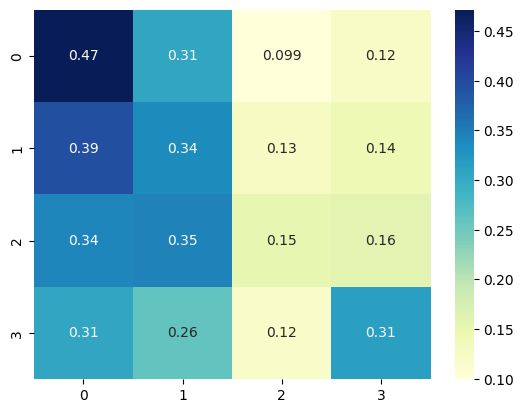

In [20]:
# Predict on dog test set
y_pred_cats = knn_cats.predict(X_test_cats)

# Print accuracy score  and weighted Kappa
our_metrics(y_test_cats, y_pred_cats, normalize=True)

/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConv

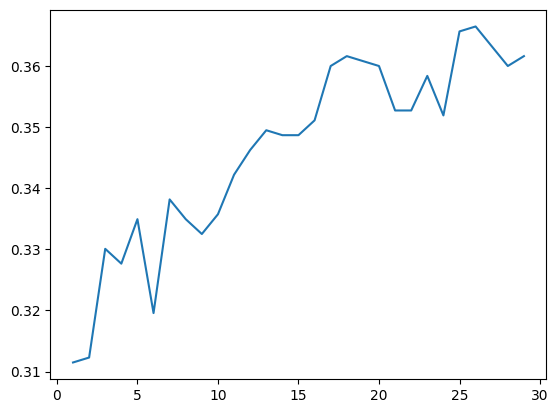

In [21]:
#check accuracy for different values for k for cats dataset
k_range = list(range(1, 30))
scores_c = []
for i in k_range:
    knn_c = KNeighborsClassifier(n_neighbors=i)
    knn_c.fit(X_train_cats, y_train_cats)
    y_pred_c = knn_c.predict(X_test_cats)
    scores_c.append(metrics.accuracy_score(y_test_cats, y_pred_c))
plt.plot(k_range, scores_c)
plt.show()

In [41]:
#checking accuracy on train data
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_cats, y_train_cats)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConv

In [42]:
# best parameter from grid search
print(grid_search.best_params_)

{'n_neighbors': 10}


In [43]:
# accuracy
accuracy = grid_search.best_score_ 
print("Accuracy for our training dataset with tuning is : {:f}" .format(accuracy) )

Accuracy for our training dataset with tuning is : 0.338264


In [44]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_cats, np.ravel(y_train_cats))

y_test_cats2=knn.predict(X_test_cats) 

test_accuracy=accuracy_score(y_test_cats,y_test_cats2)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 34.22%


### combined targets

In [22]:

# combine Target 2 and 3
y_train_cats_comb = y_train_cats.replace(3,2)
y_test_cats_comb = y_test_cats.replace(3,2)
y_train_dogs_comb = y_train_dogs.replace(3,2)
y_test_dogs_comb = y_test_dogs.replace(3,2)

In [23]:
# KNN
knn_cats_comb = KNeighborsClassifier(n_neighbors=5)
knn_cats_comb.fit((X_train_cats), (y_train_cats_comb))

y_pred_train_cats_comb = knn_cats_comb.predict(X_train_cats)
y_pred_test_cats_comb = knn_cats_comb.predict(X_test_cats)


/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.6064
_____________________
Weighted Quadratic Kappa: 0.3896


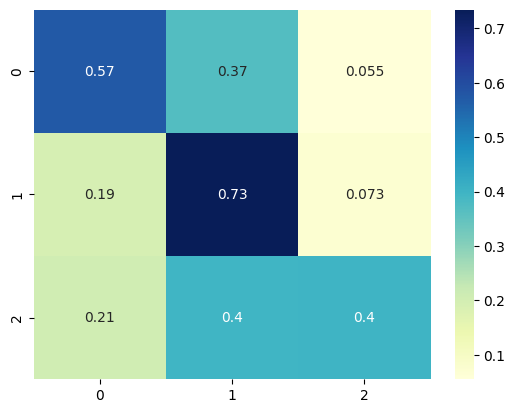

In [24]:
# Print accuracy score  and weighted Kappa for training set
our_metrics(y_train_cats_comb, y_pred_train_cats_comb, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4466
_____________________
Weighted Quadratic Kappa: 0.169


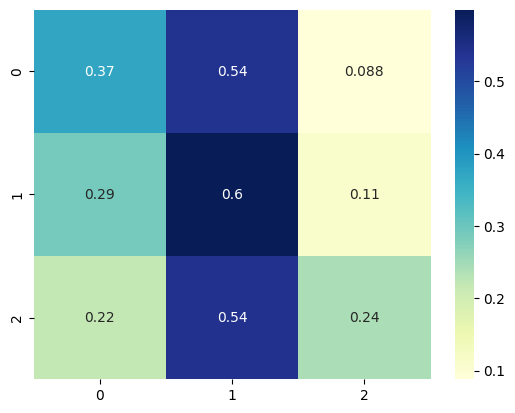

In [25]:
# Print accuracy score  and weighted Kappa for training set
our_metrics(y_test_cats_comb, y_pred_test_cats_comb, normalize=True)

In [26]:
knn_dogs_comb = KNeighborsClassifier(n_neighbors=5)
knn_dogs_comb.fit(X_train_dogs, y_train_dogs_comb)

y_pred_train_dogs_comb = knn_dogs_comb.predict(X_train_dogs)
y_pred_test_dogs_comb = knn_dogs_comb.predict(X_test_dogs)

/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.6643
_____________________
Weighted Quadratic Kappa: 0.4688


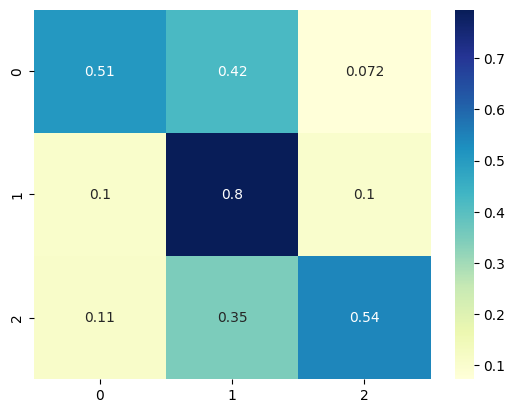

In [27]:
# Print accuracy score  and weighted Kappa for training set
our_metrics(y_train_dogs_comb, y_pred_train_dogs_comb, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.5079
_____________________
Weighted Quadratic Kappa: 0.2511


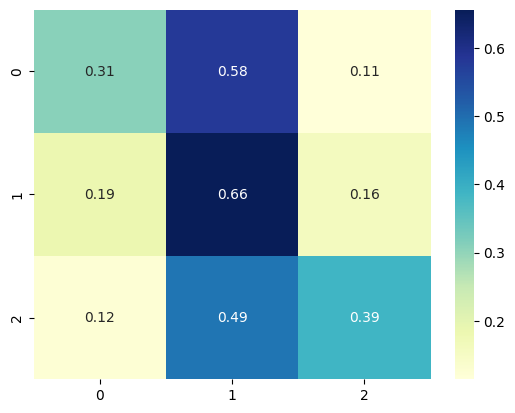

In [28]:
# Print accuracy score  and weighted Kappa for test set combined target
our_metrics(y_test_dogs_comb, y_pred_test_dogs_comb, normalize=True)